In [1]:
#CPSIO
#Autorzy:
#Tomasz Osada 242085
#Kuba Horochowski 241154

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy import signal

In [3]:
#ZAD1
# Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych sygnałów. 
# Program powinien umożliwiać obserwowanie wycinka
# sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
# zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

In [4]:
ekg1 = pd.read_csv('ekg1.txt', names=['k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12'], sep=' ')
fs_ekg1 = 1000 #częstotliwość sygnału [Hz]
t_ekg1 = (ekg1.shape[0]-1)/fs_ekg1 #czas trwania sygnału [s]
ekg1['czas'] = ekg1.index/fs_ekg1
ekg1 = ekg1.set_index('czas')
ekg1.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12
czas,,,,,,,,,,,,
0.000,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.001,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.002,106,325,219,-219,-60,284,492,837,239,372,908,405
0.003,86,306,219,-214,-55,274,487,832,240,404,179,-63
0.004,96,320,224,-195,-65,264,492,842,244,404,174,-62


In [5]:
ekg100 = pd.read_csv('ekg100.txt', names=['kolumna'])
ekg100_fs = 360 #częstotliwość sygnału [Hz]
ekg100_t = (ekg100.shape[0]-1)/ekg100_fs #czas trwania sygnału [s]
ekg100['czas'] = ekg100.index/ekg100_fs
ekg100 = ekg100.set_index('czas')
ekg100.head()

,kolumna
czas,
0.000000,-0.145
0.002778,-0.145
0.005556,-0.145
0.008333,-0.145
0.011111,-0.145


In [6]:
ekg_noise = pd.read_csv('ekg_noise.txt', names=['czas','wartość amplitudy'], sep='\s+', index_col=0)
ekg_noise_fs = 360 #częstotliwość sygnału [Hz]
ekg_noise_t = (ekg_noise.shape[0]-1)/ekg_noise_fs #czas trwania sygnału [s]
ekg_noise.head()

,wartość amplitudy
czas,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


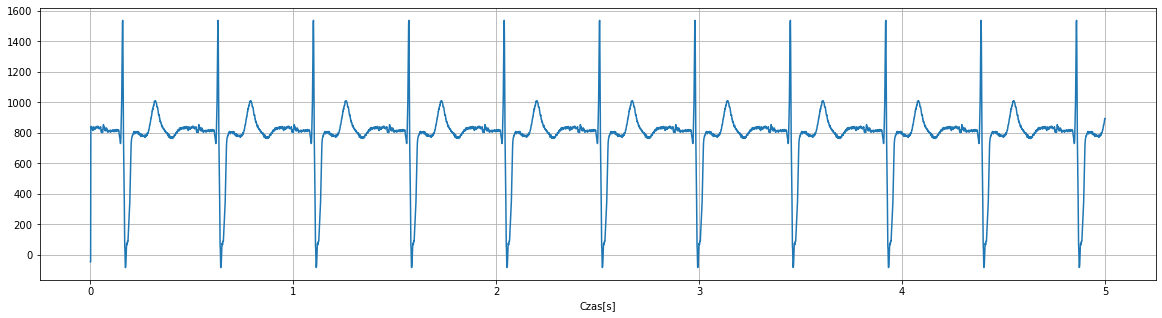

In [7]:
plt.figure(figsize=(20,5))
plt.plot(ekg1.index, ekg1['k8'], label='kolumna nr 8')
plt.grid(axis='both')
plt.xlabel('Czas[s]')
plt.show()

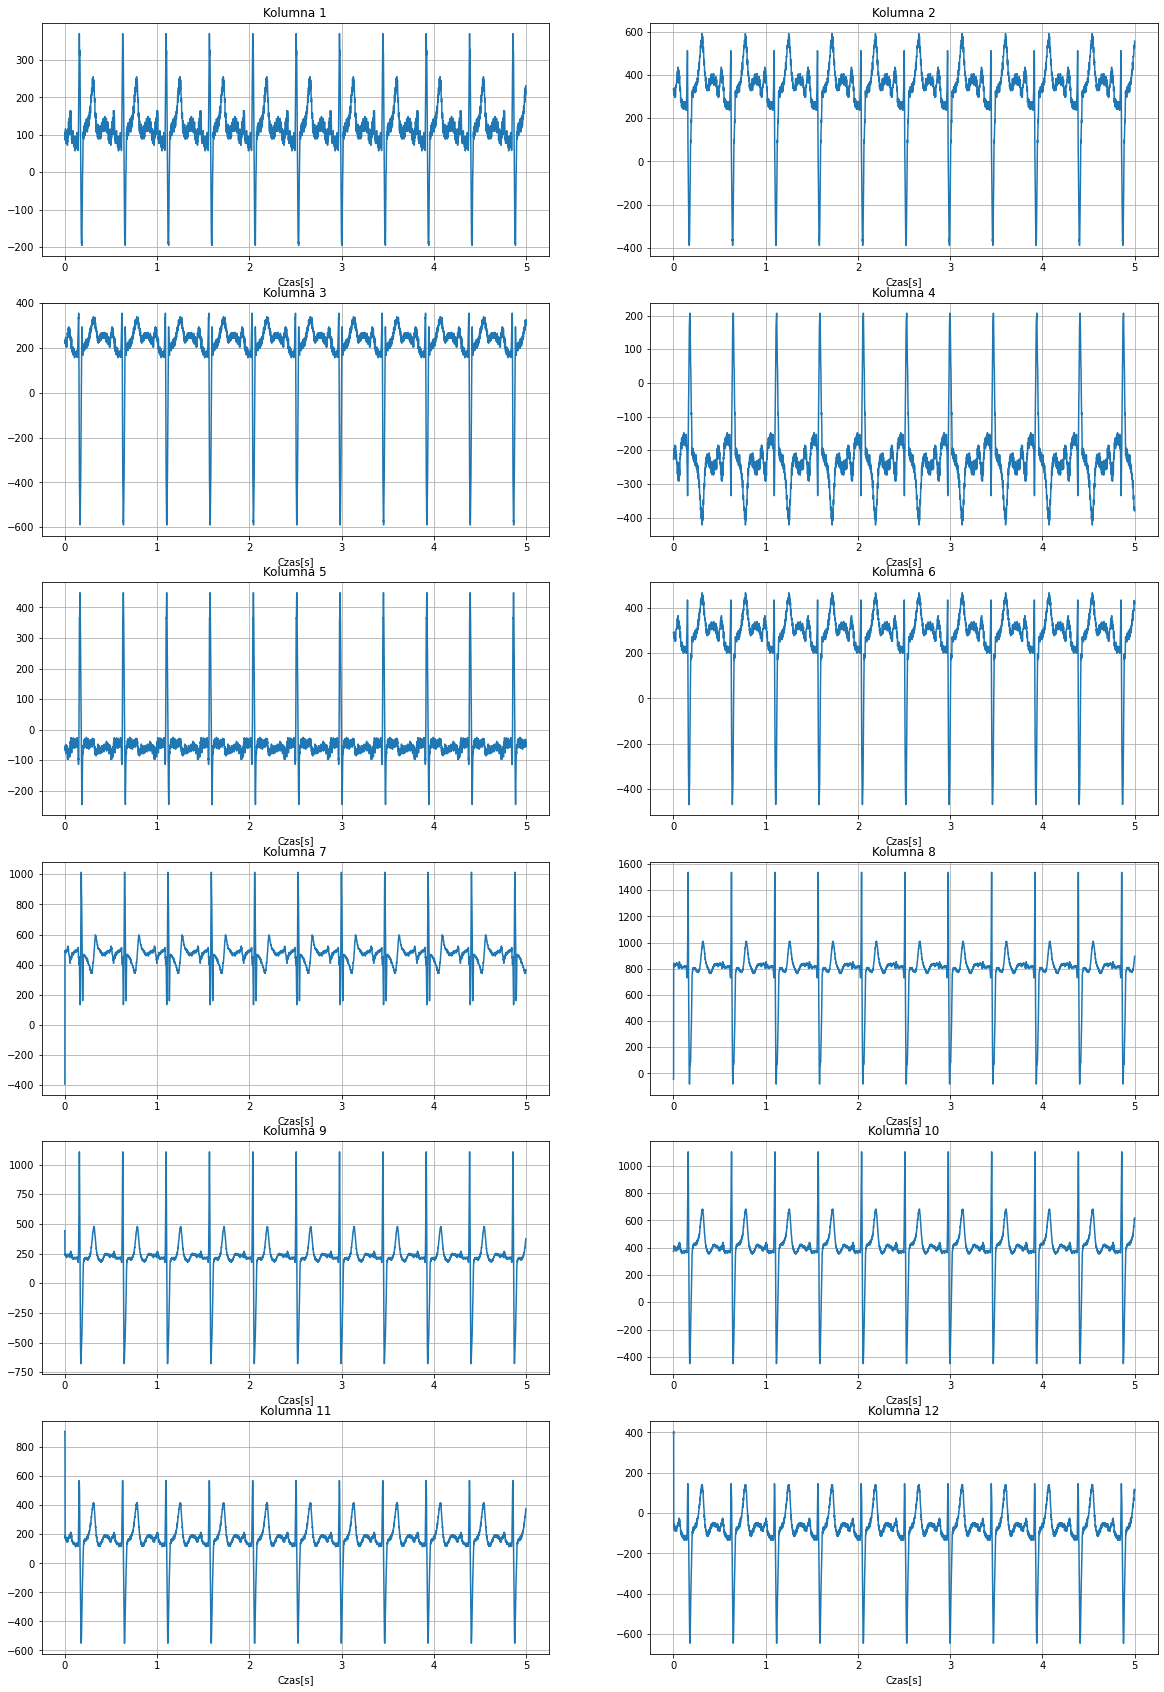

In [8]:
plt.figure(figsize=(20,30))

for i in range(1, 13):
    plt.subplot(6, 2, i)
    plt.plot(ekg1.index, ekg1['k{}'.format(i)])
    plt.grid(axis='both')
    plt.xlabel('Czas[s]')
    plt.title("Kolumna {}".format(i))

In [9]:
#ZAD2

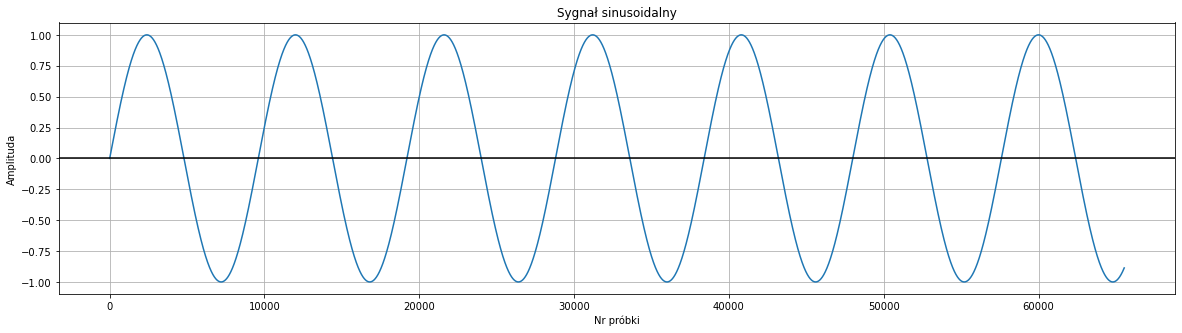

In [10]:
# 1. Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz
# i długości 65536.

# częstotliwość próbkowania [Hz]
fs = 480000
# częstotliwość [Hz]
f = 50
n = np.arange(65536)
sinus = np.sin(2 * np.pi * n * f / fs)
plt.figure(figsize=(20,5))
plt.plot(n, sinus)
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.title('Sygnał sinusoidalny')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

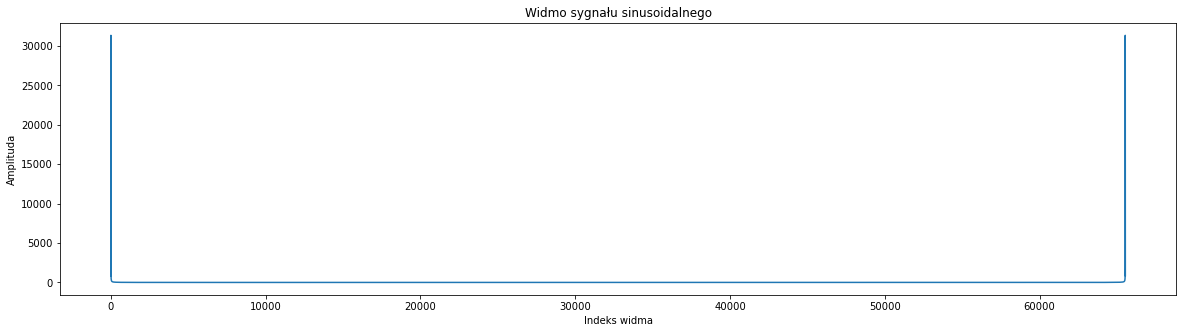

In [11]:
# 2. Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo
# amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza
# częstotliwość próbkowania.

widmo = np.fft.fft(sinus)
widmo_amp = np.abs(widmo)
plt.figure(figsize=(20,5))
plt.plot(widmo_amp)
plt.xlabel('Indeks widma')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału sinusoidalnego')
plt.show()

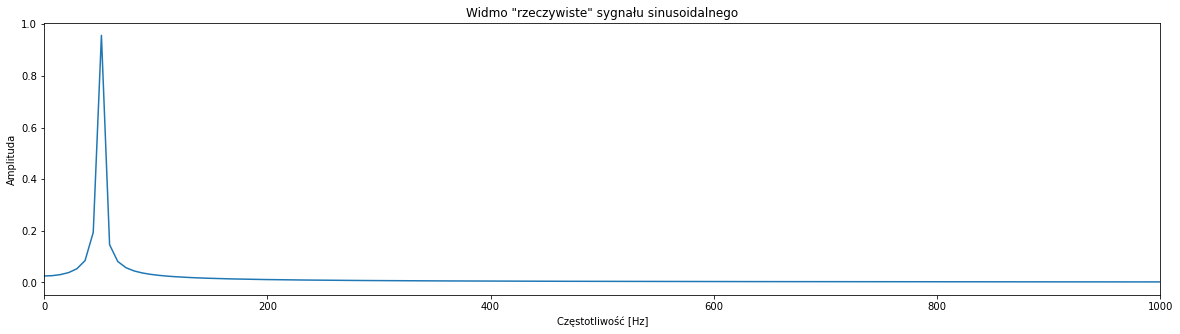

In [12]:
widmo_amp = np.abs(np.fft.rfft(sinus)) / (65536/2)
f = np.fft.rfftfreq(65536, 1/fs)
plt.figure(figsize=(20,5))
plt.plot(f, widmo_amp)
plt.xlim(0, 1000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo "rzeczywiste" sygnału sinusoidalnego')
plt.show()

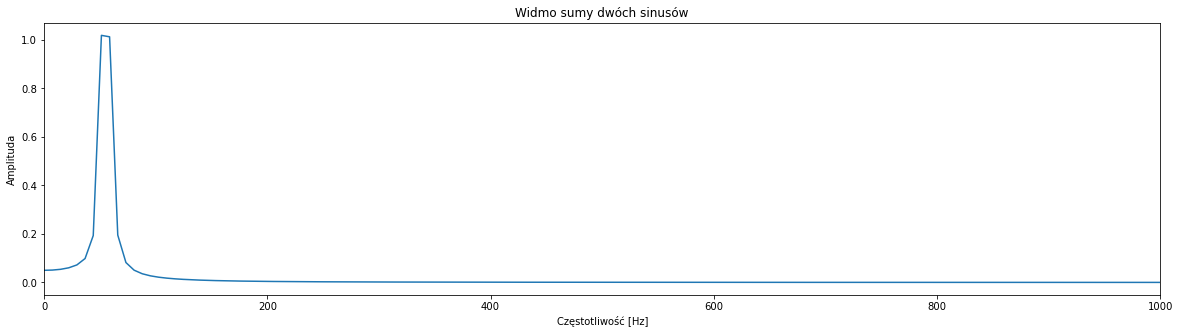

In [13]:
# 3. Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
# liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
# sygnału.

fs = 480000
trzysin = (np.sin(2 * np.pi * n * 50 / fs) +
           np.sin(2 * np.pi * n * 60 / fs))
widmo_trzysin = np.fft.rfft(trzysin)
plt.figure(figsize=(20,5))
plt.plot(f, np.abs(widmo_trzysin) / (65536/2))
plt.xlim(0, 1000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sumy dwóch sinusów')
plt.show()

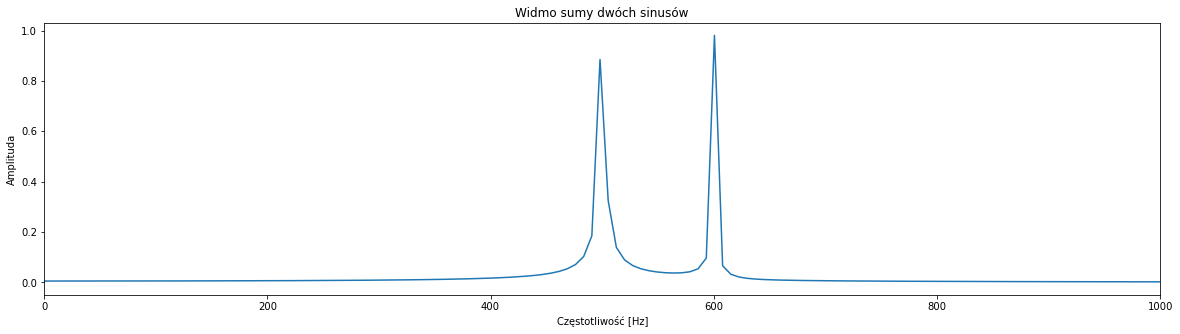

In [14]:
fs = 48000
trzysin = (np.sin(2 * np.pi * n * 50 / fs) +
           np.sin(2 * np.pi * n * 60 / fs))
widmo_trzysin = np.fft.rfft(trzysin)
plt.figure(figsize=(20,5))
plt.plot(f, np.abs(widmo_trzysin) / (65536/2))
plt.xlim(0, 1000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sumy dwóch sinusów')
plt.show()

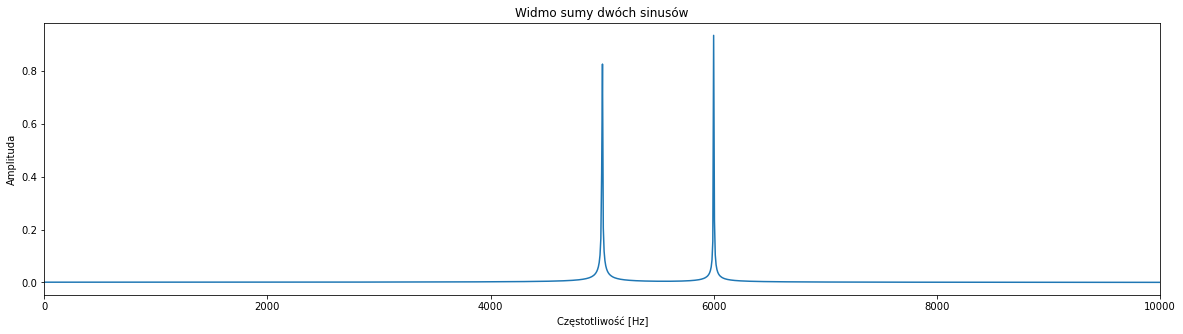

In [15]:
fs = 4800
trzysin = (np.sin(2 * np.pi * n * 50 / fs) +
           np.sin(2 * np.pi * n * 60 / fs))
widmo_trzysin = np.fft.rfft(trzysin)
plt.figure(figsize=(20,5))
plt.plot(f, np.abs(widmo_trzysin) / (65536/2))
plt.xlim(0, 10000)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sumy dwóch sinusów')
plt.show()

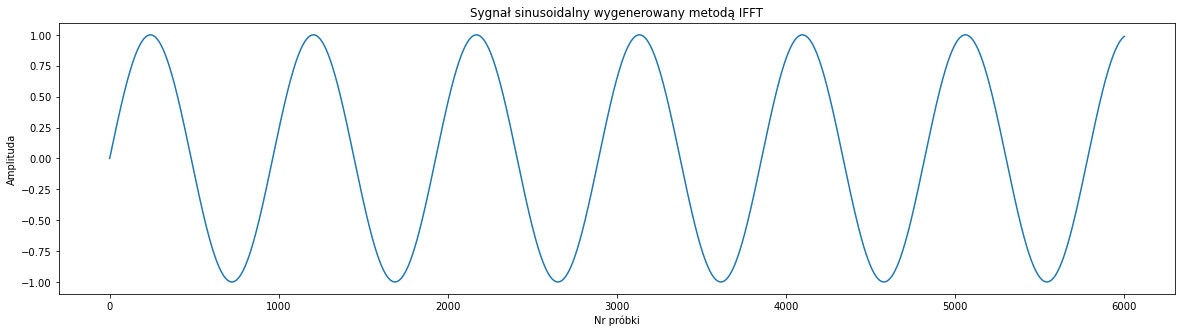

In [16]:
# 5. Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2
# i porównaj z ciągami oryginalnymi.

widmo = np.zeros(32769, dtype=np.complex)
widmo[68] = -32768j
wynik = np.real(np.fft.irfft(widmo))
plt.figure(figsize=(20,5))
plt.plot(wynik[:6000])
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.title('Sygnał sinusoidalny wygenerowany metodą IFFT')
plt.show()

In [17]:
#ZAD3

In [18]:
#Dla początkowych 2880 próbek
#1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
ekg100 = pd.read_csv('ekg100.txt', names=['kolumna'])
#ilosc początkowych probek
n=2880
ekg100 = ekg100.head(n)
ekg100_fs = 360 #częstotliwość sygnału [Hz]
ekg100_t = (ekg100.shape[0]-1)/ekg100_fs #czas trwania sygnału [s]
ekg100['czas'] = ekg100.index/ekg100_fs
ekg100 = ekg100.set_index('czas')

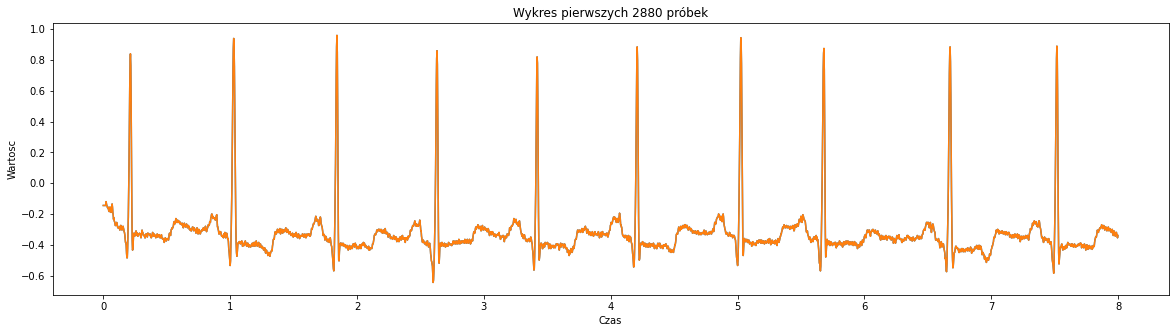

In [19]:
plt.figure(figsize=(20,5))
plt.plot(ekg100.index, ekg100['kolumna'], label='kolumna')
plt.plot(ekg100)
plt.xlabel('Czas')
plt.ylabel('Wartosc')
plt.title('Wykres pierwszych 2880 próbek')
plt.show()

In [20]:
#2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo ampli-tudowe sygnału w funkcji 
#częstotliwości w zakresie[0,  fs/2], gdzie fs oznaczaczęstotliwość próbkowania.
freqs = fftfreq(n)
mask = freqs > 0
y=fft(ekg100['kolumna'].values)
fft_val = 2.0*np.abs(y/n)

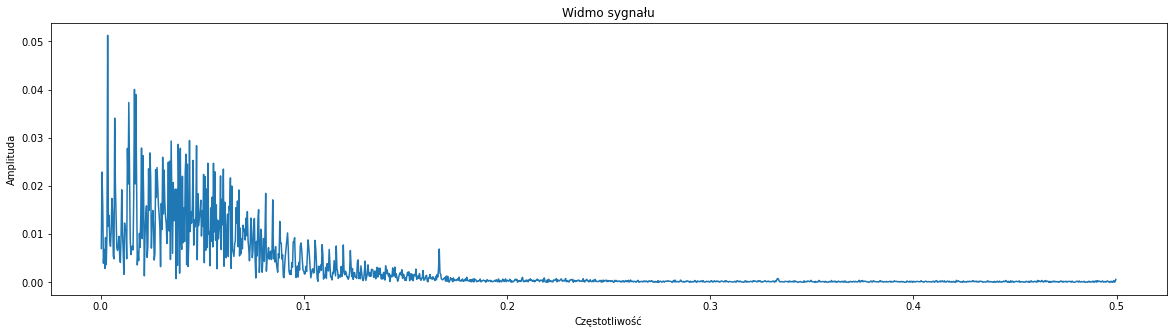

In [21]:
plt.figure(figsize=(20,5))

plt.plot(freqs[mask], fft_val[mask])
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału')
plt.show()

In [22]:
#3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego wpunkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem e
#cg100(można wyznaczyć różnicę sygnałów).
y=ifft(y)

c:\users\osad5\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


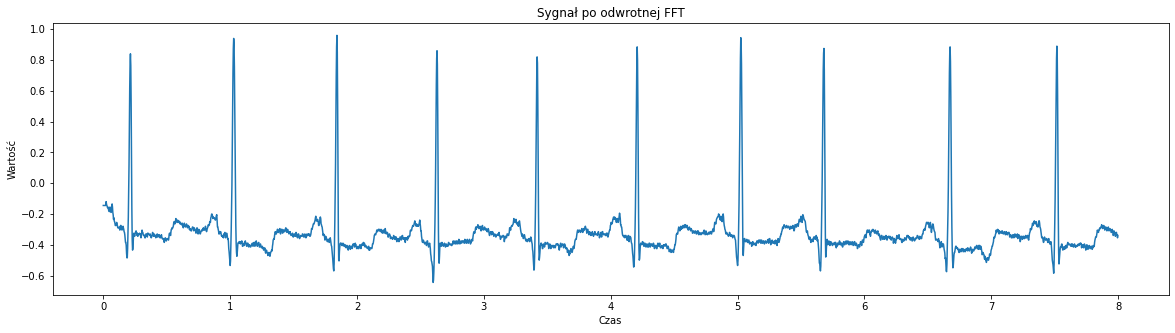

In [23]:
plt.figure(figsize=(20,5))
plt.plot(ekg100.index, y)
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Sygnał po odwrotnej FFT')
plt.show()

In [24]:
#Powtarzamy dla wszystkich danych sygnału
ekg100 = pd.read_csv('ekg100.txt', names=['kolumna'])

ekg100_fs = 360 #częstotliwość sygnału [Hz]
ekg100_t = (ekg100.shape[0]-1)/ekg100_fs #czas trwania sygnału [s]
ekg100['czas'] = ekg100.index/ekg100_fs
ekg100 = ekg100.set_index('czas')

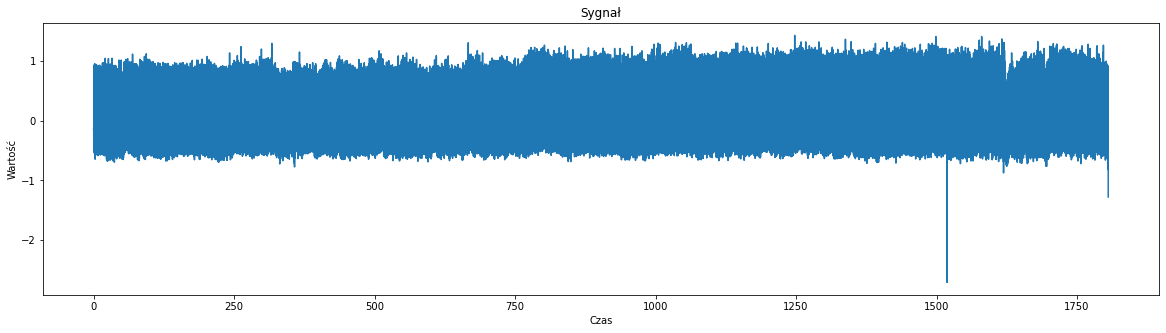

In [25]:
#Wszystkie dane z sygnału
#1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
plt.figure(figsize=(20,5))
plt.plot(ekg100.index, ekg100['kolumna'], label='kolumna')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Sygnał')
plt.show()
n=ekg100.shape[0]

In [26]:
#2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić 
#widmo ampli-tudowe sygnału w funkcji częstotliwości w zakresie[0,  fs/2],
#gdzie fs oznaczaczęstotliwość próbkowania.
freqs = fftfreq(n)
mask = freqs > 0
y=fft(ekg100['kolumna'].values)
fft_vals = 2.0*np.abs(y/n)

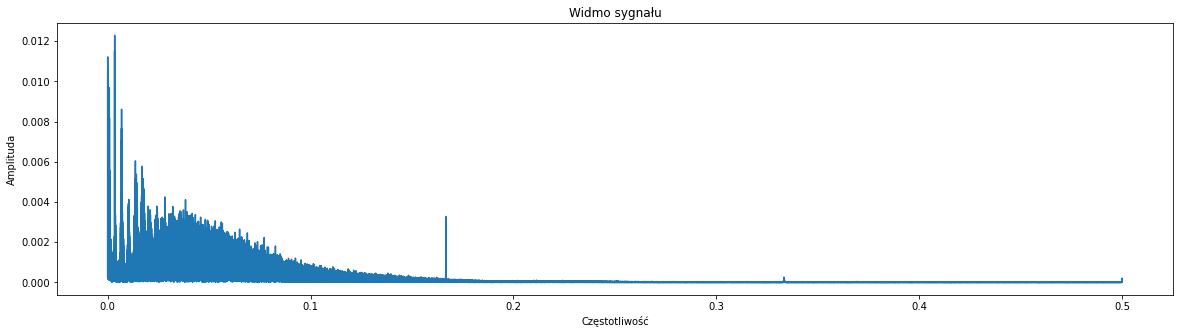

In [27]:
plt.figure(figsize=(20,5))

plt.plot(freqs[mask], fft_vals[mask])
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału')
plt.show()

In [28]:
#3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego wpunkcie 2 i 
#porównać otrzymany ciąg próbek z pierwotnym sygnałem ecg100(można wyznaczyć różnicę sygnałów).
y=ifft(y)

c:\users\osad5\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


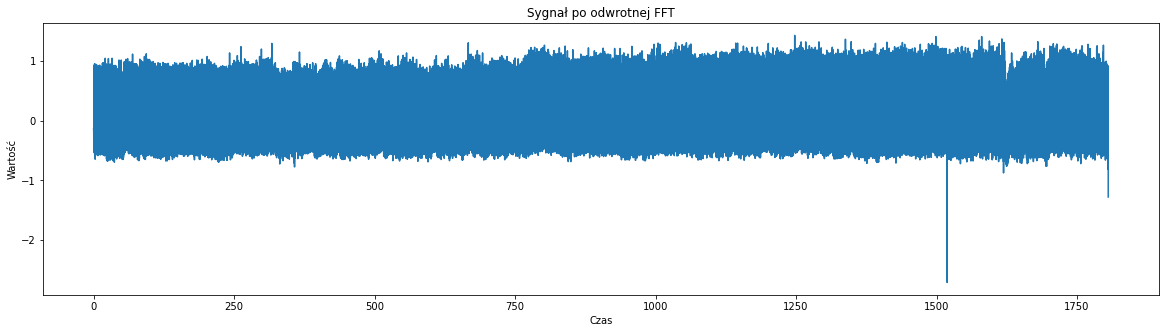

In [29]:
plt.figure(figsize=(20,5))

plt.plot(ekg100.index, y, label='kolumna')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Sygnał po odwrotnej FFT')
plt.show()

In [30]:
#ZAD 4

In [31]:
#Cwiczenie 4. Celem cwiczenia jest praktyczne wypróbowanie działania filtrów
#w celu wyeliminowania niepozadanych zakłócen z sygnału EKG. Prosze wybrac
#rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji
#wykorzystac gotowe funkcje z biblioteki scipy.signal [7]. Biblioteka posiada równiez
#funkcje wspomagajace projektowanie filtrów, które mozna zastosowac.

#1. Wczytaj sygnał ekg noise.txt i zauwaz zakłócenia nałozone na sygnał. Wykreslic
#czestotliwosciowa charakterystyke amplitudowa sygnału.
ekg_noise = pd.read_csv('ekg_noise.txt', names=['czas','A'], sep='\s+', index_col=0)
ekg_noise_fs = 360 #częstotliwość sygnału [Hz]
ekg_noise_t = (ekg_noise.shape[0]-1)/ekg_noise_fs #czas trwania sygnału [s]
ekg_noise.head()

,A
czas,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


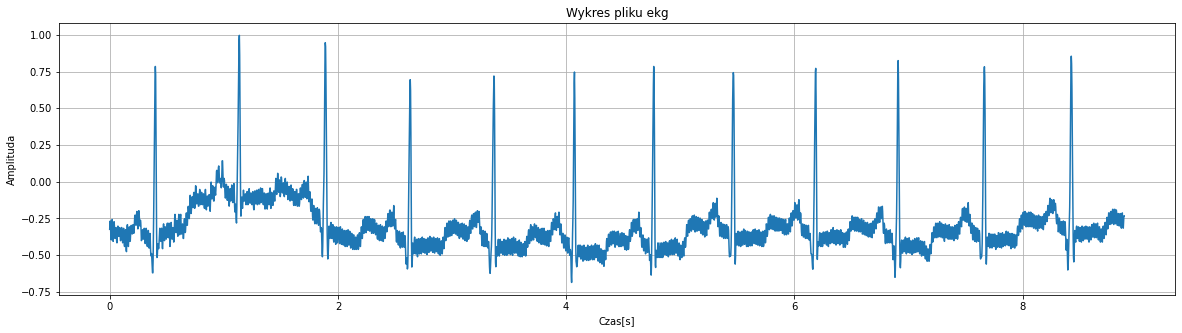

In [32]:

plt.figure(figsize=(20,5))
plt.plot(ekg_noise.index, ekg_noise['A'], label='Noise')
plt.title("Wykres pliku ekg")
plt.ylabel('Amplituda')
plt.xlabel('Czas[s]')
plt.grid(axis='both')

In [33]:
#2. Zbadaj filtr dolnoprzepustowy o czestotliwosci granicznej 60 Hz w celu redukcji
#zakłócen pochodzacych z sieci zasilajacej. Wyznacz parametry filtra, wykresl
#jego charakterystyke (zaleznosc tłumienia od czestotliwosci), przebieg sygnału
#po filtracji oraz jego widmo. Mozna tez wyznaczyc róznice miedzy sygnałem
#przed i po filtracji i widmo tej róznicy.

#filtr dolnoprzepustowy

ekg_noise_fd = 60 #częstotliwość graniczna [Hz]

sos = signal.butter(4, ekg_noise_fd, 'low', fs=360, output='sos')
filtered_signal = signal.sosfilt(sos, ekg_noise['A'])


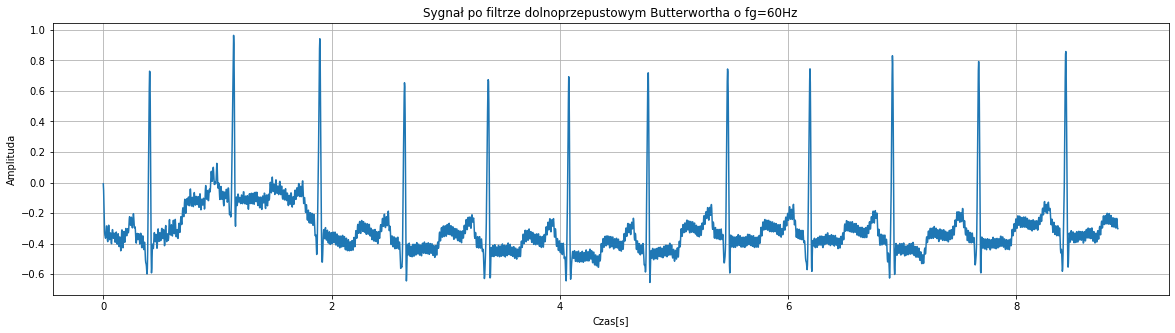

In [34]:
plt.figure(figsize=(20,5))
plt.plot(ekg_noise.index, filtered_signal)
plt.title("Sygnał po filtrze dolnoprzepustowym Butterwortha o fg=60Hz")
plt.ylabel('Amplituda')
plt.xlabel('Czas[s]')
plt.grid(axis='both')

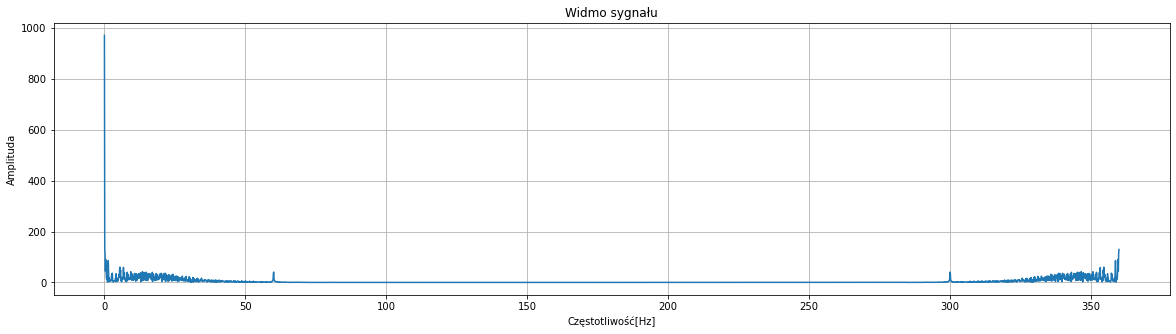

In [35]:
length = len(filtered_signal)
fft = np.fft.fft(filtered_signal)
fft = np.abs(fft)
x = 360 * np.arange(length) / length

plt.figure(figsize=(20,5))
plt.plot(x, fft)
plt.title("Widmo sygnału")
plt.ylabel('Amplituda')
plt.xlabel('Częstotliwość[Hz]')
plt.grid(axis='both')

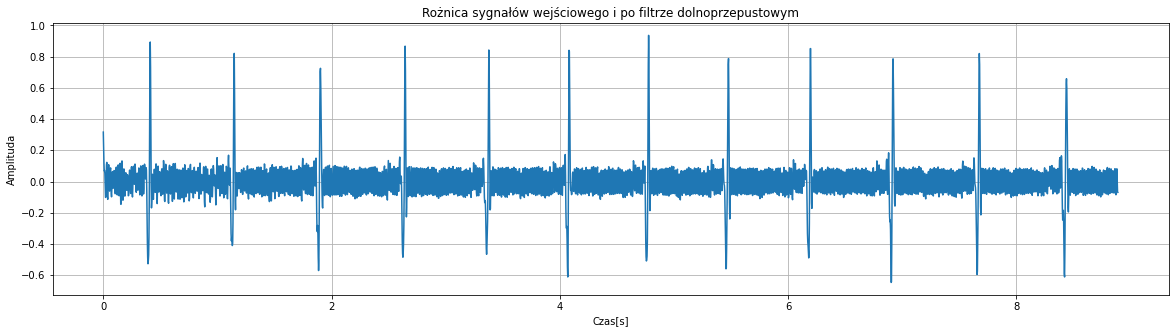

In [36]:
difference = filtered_signal -ekg_noise['A'] 
plt.figure(figsize=(20,5))
plt.plot(ekg_noise.index, difference)
plt.title("Rożnica sygnałów wejściowego i po filtrze dolnoprzepustowym")
plt.ylabel('Amplituda')
plt.xlabel('Czas[s]')
plt.grid(axis='both')

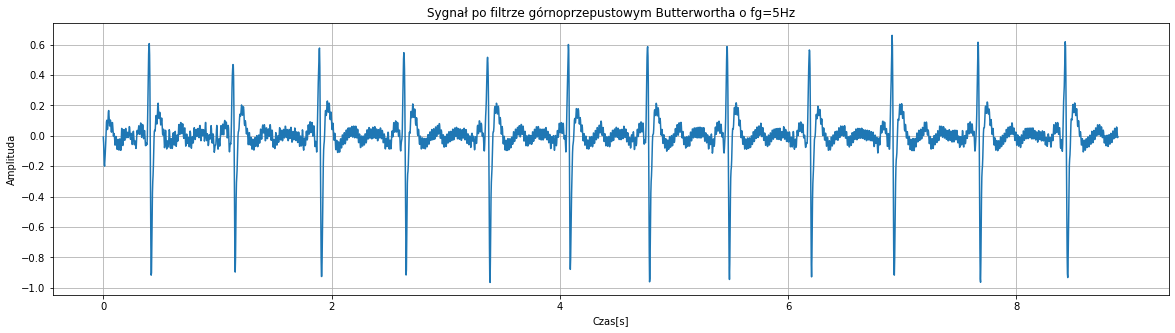

In [37]:
#3. Zastosuj nastepnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy
#o czestotliwosci granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.
#Sporzadz wykresy sygnałów jak w punkcie 2.

#filtr górnoprzepustowy

ekg_noise_fg = 5 #częstotliwość graniczna [Hz]

sos = signal.butter(4, ekg_noise_fg, 'high', fs=360, output='sos')
filtered_signal2 = signal.sosfilt(sos, filtered_signal)

plt.figure(figsize=(20,5))
plt.plot(ekg_noise.index, filtered_signal2)
plt.title("Sygnał po filtrze górnoprzepustowym Butterwortha o fg=5Hz")
plt.ylabel('Amplituda')
plt.xlabel('Czas[s]')
plt.grid(axis='both')

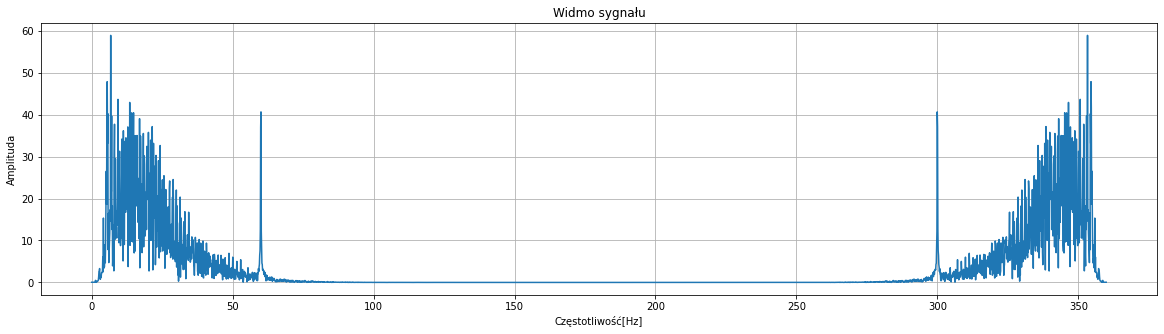

In [38]:
length = len(filtered_signal2)
fft = np.fft.fft(filtered_signal2)
fft = np.abs(fft)
x = 360 * np.arange(length) / length

plt.figure(figsize=(20,5))
plt.plot(x, fft)
plt.title("Widmo sygnału")
plt.ylabel('Amplituda')
plt.xlabel('Częstotliwość[Hz]')
plt.grid(axis='both')

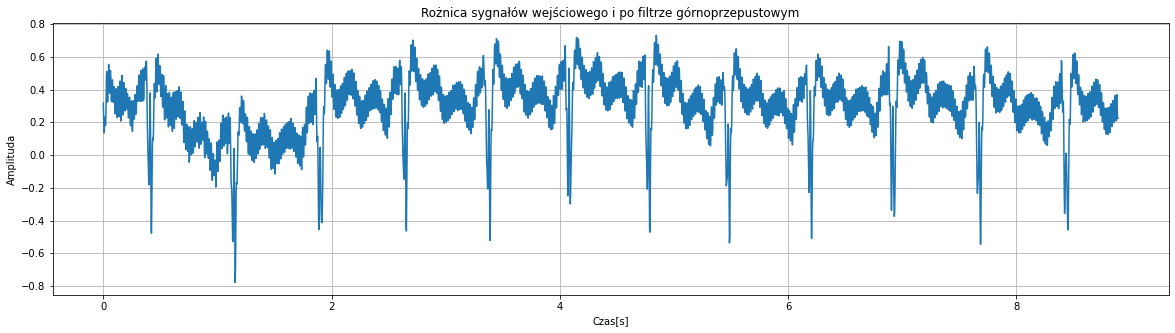

In [39]:
difference2 = filtered_signal2 - ekg_noise['A'] 
plt.figure(figsize=(20,5))
plt.plot(ekg_noise.index, difference2)
plt.title("Rożnica sygnałów wejściowego i po filtrze górnoprzepustowym")
plt.ylabel('Amplituda')
plt.xlabel('Czas[s]')
plt.grid(axis='both')


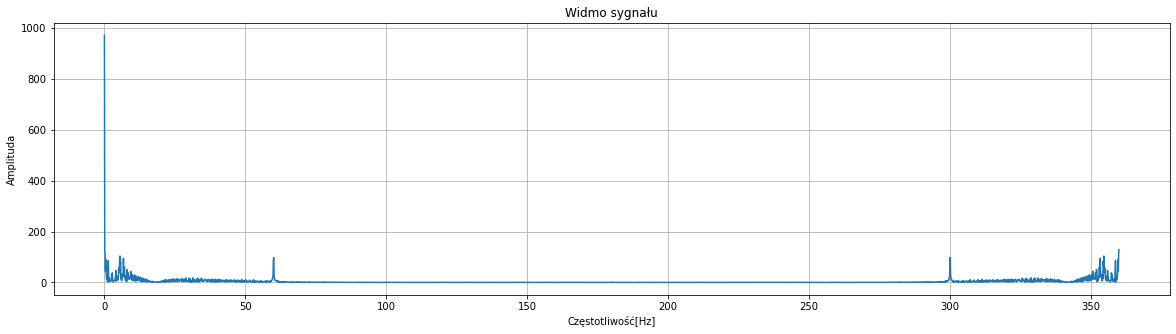

In [40]:
length = len(difference2)
fft = np.fft.fft(difference2)
fft = np.abs(fft)
x = 360 * np.arange(length) / length

plt.figure(figsize=(20,5))
plt.plot(x, fft)
plt.title("Widmo sygnału")
plt.ylabel('Amplituda')
plt.xlabel('Częstotliwość[Hz]')
plt.grid(axis='both')